<a href="https://colab.research.google.com/github/shubhambhunia4/ML-Lab-Codes/blob/main/Hierarchical_clustering(Q_14).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

In [ ]:
data = pd.read_csv("cars_clus.csv")

In [ ]:
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


In [ ]:
data.shape

(159, 16)

In [ ]:
# --- Data Preprocessing ---
# Replace '$null$' with NaN
data = data.replace('$null$', np.nan)

# Columns to convert to numeric and use for clustering
clustering_cols = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']

# Convert relevant columns to numeric, coercing errors
for col in clustering_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Select columns for clustering and drop rows with missing values in these columns
data_numeric = data[clustering_cols].dropna()

# Display info and head of the cleaned numeric data
print("Data_numeric head after cleaning:")
display(data_numeric.head())
print("\nData_numeric info after cleaning:")
data_numeric.info()

Data_numeric head after cleaning:


,sales,resale,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933



Data_numeric info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 149
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sales     117 non-null    float64
 1   resale    117 non-null    float64
 2   price     117 non-null    float64
 3   engine_s  117 non-null    float64
 4   horsepow  117 non-null    float64
 5   wheelbas  117 non-null    float64
 6   width     117 non-null    float64
 7   length    117 non-null    float64
 8   curb_wgt  117 non-null    float64
 9   fuel_cap  117 non-null    float64
 10  mpg       117 non-null    float64
 11  lnsales   117 non-null    float64
dtypes: float64(12)
memory usage: 11.9 KB


In [ ]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(data_numeric)


--- Agglomerative Clustering using Single Linkage ---


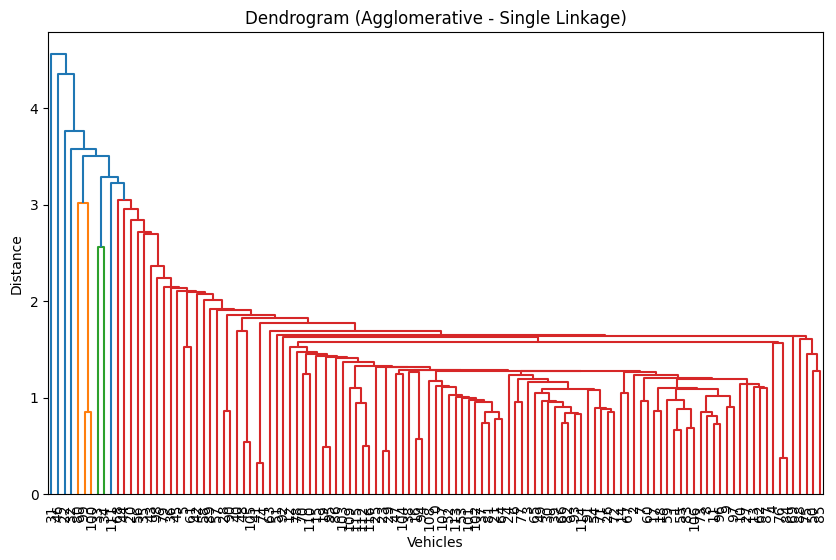

Cluster counts (single linkage):
 Cluster_single
1.0    114
2.0      1
4.0      1
3.0      1
Name: count, dtype: int64


--- Agglomerative Clustering using Complete Linkage ---


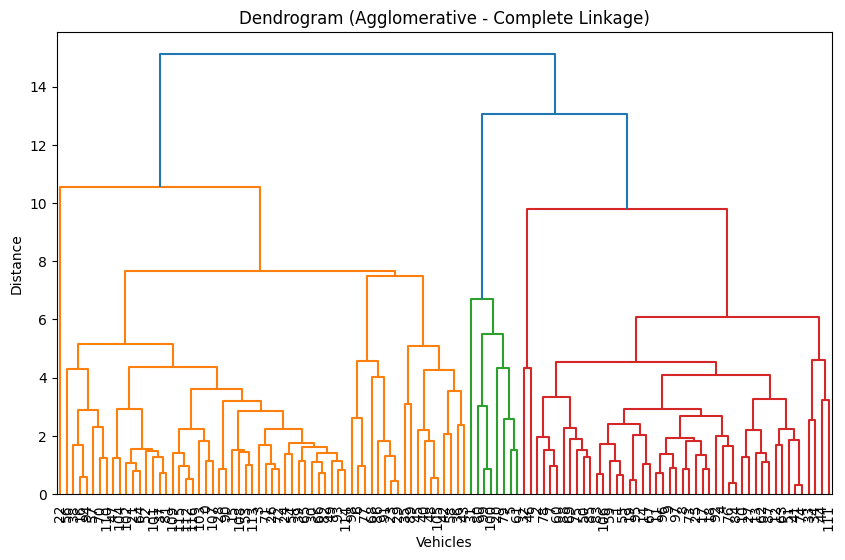

Cluster counts (complete linkage):
 Cluster_complete
1.0    61
4.0    47
3.0     8
2.0     1
Name: count, dtype: int64


--- Agglomerative Clustering using Average Linkage ---


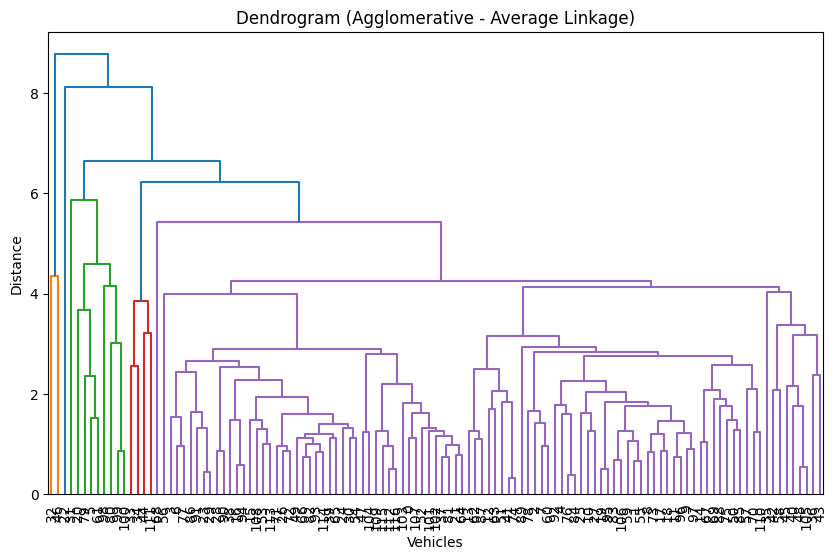

Cluster counts (average linkage):
 Cluster_average
3.0    105
2.0      9
1.0      2
4.0      1
Name: count, dtype: int64



In [ ]:
# --- Hierarchical Clustering (Agglomerative) ---
linkage_methods = ['single', 'complete', 'average']

for method in linkage_methods:
    print(f"\n--- Agglomerative Clustering using {method.capitalize()} Linkage ---")
    Z = linkage(X, method=method)

    # Plot Dendrogram
    plt.figure(figsize=(10, 6))
    plt.title(f"Dendrogram (Agglomerative - {method.capitalize()} Linkage)")
    dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
    plt.xlabel("Vehicles")
    plt.ylabel("Distance")
    plt.show()

    # Form flat clusters (example: 4 clusters)
    clusters = fcluster(Z, 4, criterion='maxclust')

    # Create a DataFrame for clusters with the index of data_numeric
    cluster_df = pd.DataFrame(clusters, index=data_numeric.index, columns=[f'Cluster_{method}'])

    # Merge cluster assignments back to the original data DataFrame based on index
    data = data.merge(cluster_df, left_index=True, right_index=True, how='left')

    print(f"Cluster counts ({method} linkage):\n", data[f'Cluster_{method}'].value_counts())
    print()

In [ ]:
# --- Divisive Clustering (Top-down approach) ---
# There is no built-in Divisive Clustering in sklearn or scipy,
# but we can simulate it using hierarchical clustering on the transposed linkage.

from scipy.cluster.hierarchy import linkage, to_tree

def divisive_clustering(X, k=4, method='ward'):
    """
    Simple simulation of divisive clustering by splitting recursively using hierarchical clustering.
    """
    from sklearn.cluster import AgglomerativeClustering
    labels = np.zeros(X.shape[0])
    current_label = 0
    clusters = [X]

    while len(clusters) < k:
        # Choose the largest cluster to split
        cluster_sizes = [c.shape[0] for c in clusters]
        i = np.argmax(cluster_sizes)
        cluster_to_split = clusters.pop(i)

        if cluster_to_split.shape[0] < 2:
            break

        # Split using Agglomerative (2 clusters)
        model = AgglomerativeClustering(n_clusters=2, linkage=method)
        new_labels = model.fit_predict(cluster_to_split)

        clusters.append(cluster_to_split[new_labels == 0])
        clusters.append(cluster_to_split[new_labels == 1])

    return clusters

In [ ]:
# Perform Divisive Clustering
clusters_divisive = divisive_clustering(X, k=4, method='average')
print(f"\nDivisive Clustering created {len(clusters_divisive)} clusters.\n")



Divisive Clustering created 4 clusters.



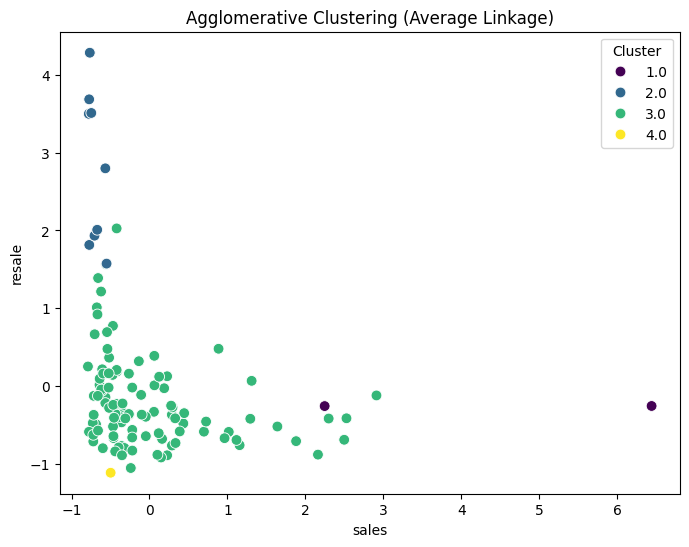


Cluster Summary (Average Linkage):
                      sales     resale      price  engine_s    horsepow  \
Cluster_average                                                           
1.0              383.811000  15.067500  23.197500  4.900000  225.000000   
2.0                6.536778  50.274444  63.461667  4.522222  309.888889   
3.0               57.788886  15.446905  22.968048  2.906667  170.628571   
4.0               21.855000   5.160000   9.235000  1.000000   55.000000   

                   wheelbas      width      length  curb_wgt   fuel_cap  \
Cluster_average                                                           
1.0              138.600000  79.200000  224.350000  4.355500  25.550000   
2.0              102.977778  72.088889  183.500000  3.502222  19.955556   
3.0              107.239048  71.041905  187.746667  3.302743  17.553333   
4.0               93.100000  62.600000  149.400000  1.895000  10.300000   

                       mpg   lnsales  
Cluster_average        

In [ ]:
# --- Visualization of Agglomerative Clusters (Example: Average linkage) ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X[:, 0], y=X[:, 1],
    hue=data.loc[data_numeric.index, 'Cluster_average'], palette='viridis', s=60
)
plt.title("Agglomerative Clustering (Average Linkage)")
plt.xlabel(data_numeric.columns[0])
plt.ylabel(data_numeric.columns[1])
plt.legend(title='Cluster')
plt.show()

# --- Summary of Clusters ---
print("\nCluster Summary (Average Linkage):")
# Make sure to use the data_numeric DataFrame for calculating the mean after dropping NaNs
# and merge the cluster assignments back to the original data based on index if needed for summary
# For simplicity, let's calculate the mean on the clustered data_numeric
clustered_data_numeric = data_numeric.copy()
clustered_data_numeric['Cluster_average'] = data.loc[data_numeric.index, 'Cluster_average']
print(clustered_data_numeric.groupby('Cluster_average').mean())